<a href="https://colab.research.google.com/github/skdevS18/Images_classification/blob/main/%F0%9D%94%BB%F0%9D%94%BE_Unsupervised_Text_Classification_Using_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Define colab settings
import pandas as pd
pd.set_option('display.max_columns', None)

## [0] Define preprocessing tasks

In [ ]:
# Define preprocessing functions

import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize
import string
import re

# Preprocessing function

def custom_clean(text):
    # Remove whitespace character
    # i.e. spaces, tabs, newlines, and other Unicode space separators
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Remove non-alphabetic characters
    text = ' '.join([t for t in text.split() if t.isalpha()])
    # Remove stop words
    text = ' '.join([t for t in text.split() if t not in stopwords])
    return text

def custom_tokenize(text):
    # Remove whitespace character
    # i.e. spaces, tabs, newlines, and other Unicode space separators
    text = re.sub(r'\s+', ' ', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Convert to lowercase and remove punctuation
    tokens = [token.lower().translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    # Remove non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## [1] K-Means clustering with dataframe output [review,sentiment,clusters,...]

In [3]:
# [0] Get dataset
import nltk
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
# [1] Prep dataset
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
list_sentiment = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]


In [6]:
import nltk
from nltk.tokenize import word_tokenize

# Define a custom tokenizer function
def custom_tokenize(text):
    # Tokenize the text using NLTK's word_tokenize function
    tokens = word_tokenize(text)
    return tokens

# Now you can use this custom tokenizer in the TfidfVectorizer


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# [2] Vectorize dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Vectorize the text data using TF-IDF
# use custom tokenizer, select only 4000 features
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None,max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Cluster dataset
# Perform K-means clustering
n_cluster=2
kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=42)
kmeans.fit(X)
kmeans

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
# [4] Prep dataframe for clustered dataset
# [4a] default 2 cluster
# Initialize an empty DataFrame
df_review = pd.DataFrame()
df_review['review']=list_review
df_review['sentiment']=list_sentiment

# Get the cluster labels for each review
ndarray_cluster_label = kmeans.labels_

# Add cluster values to dataframe
df_review['cluster'+str(n_cluster)] = ndarray_cluster_label

# Fill NaN values with False
df_review.fillna(False, inplace=True)

# Display the resulting DataFrame
df_review.head(10)

,review,sentiment,cluster2
0,"plot : two teen couples go to a church party ,...",neg,0
1,the happy bastard's quick movie review \ndamn ...,neg,0
2,it is movies like these that make a jaded movi...,neg,0
3,""" quest for camelot "" is warner bros . ' firs...",neg,1
4,synopsis : a mentally unstable man undergoing ...,neg,0
5,capsule : in 2176 on the planet mars police ta...,neg,1
6,"so ask yourself what "" 8mm "" ( "" eight millime...",neg,1
7,that's exactly how long the movie felt to me ....,neg,1
8,call it a road trip for the walking wounded . ...,neg,1
9,plot : a young french boy sees his parents kil...,neg,0


In [ ]:
# [4b] explore n_cluster variations

# List of cluster values to explore
list_n_cluster = [4, 6, 8, 10, 12]


# Add cluster values to dataframe
for n_cluster in list_n_cluster:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=42)
    kmeans.fit(X)

    # Get the cluster labels for each review
    ndarray_cluster_label = kmeans.labels_

    df_review['cluster'+str(n_cluster)] = ndarray_cluster_label

# Fill NaN values with False
df_review.fillna(False, inplace=True)

# Display the resulting DataFrame
df_review.head()


,review,sentiment,cluster2,cluster4,cluster6,cluster8,cluster10,cluster12
0,"plot : two teen couples go to a church party ,...",neg,0,2,5,7,2,1
1,the happy bastard's quick movie review \ndamn ...,neg,0,2,5,7,2,7
2,it is movies like these that make a jaded movi...,neg,0,2,5,1,6,1
3,""" quest for camelot "" is warner bros . ' firs...",neg,1,1,0,0,3,9
4,synopsis : a mentally unstable man undergoing ...,neg,0,3,5,1,6,1


In [ ]:
# Sum the occurence of clusters for each columns
# Exclude the first two columns and count the occurrences of each value
for column in df_review.columns[2:]:
    value_counts = df_review[column].value_counts().sort_index()
    print(f"Value counts for {column}:")
    print(value_counts)
    print()

Value counts for cluster2:
0     781
1    1219
Name: cluster2, dtype: int64

Value counts for cluster4:
0     45
1    633
2    532
3    790
Name: cluster4, dtype: int64

Value counts for cluster6:
0    660
1    147
2    233
3    431
4     39
5    490
Name: cluster6, dtype: int64

Value counts for cluster8:
0    131
1    563
2     54
3     75
4    495
5    292
6     24
7    366
Name: cluster8, dtype: int64

Value counts for cluster10:
0     17
1    232
2    419
3     55
4     35
5     23
6    486
7     38
8     83
9    612
Name: cluster10, dtype: int64

Value counts for cluster12:
0      34
1     613
2     131
3     334
4     110
5      55
6      26
7      56
8     533
9      79
10     13
11     16
Name: cluster12, dtype: int64



## [2] K-Means clustering with scatterplot output

### [2.1] K-Means clustering with scatterplot output (1 output with 2 cluster groups)

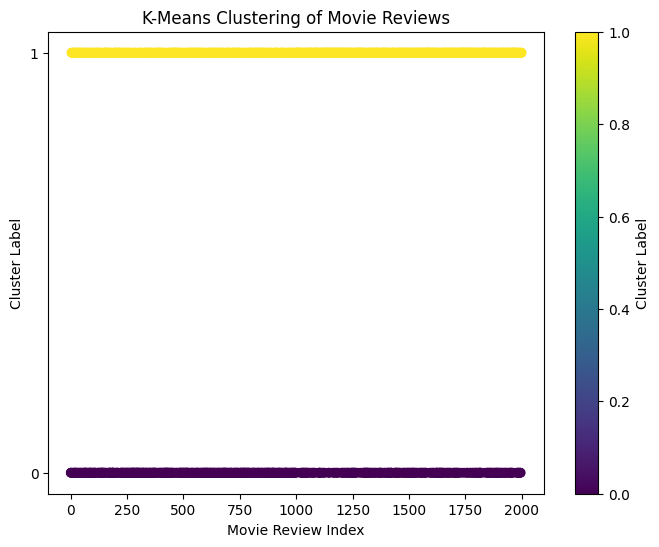

In [ ]:
# [5] Cluster and Visualize groups
# Create a scatter plot

# Get the values of the specific column as an ndarray
ndarray_cluster = df_review.iloc[:, 2].values
# Get the unique values and sort them in ascending order
unique_values = np.sort(np.unique(ndarray_cluster))

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(range(len(list_review)), ndarray_cluster, c=ndarray_cluster, cmap='viridis', marker='o')
plt.xlabel("Movie Review Index")
plt.ylabel("Cluster Label")
plt.title("K-Means Clustering of Movie Reviews")
plt.colorbar(label="Cluster Label")
# Set the y-axis ticks and labels using sorted unique values
plt.gca().set_yticks(unique_values)
plt.gca().set_yticklabels(unique_values)

plt.show()

### [2.2] K-Means clustering with scatterplot output (2 outputs)

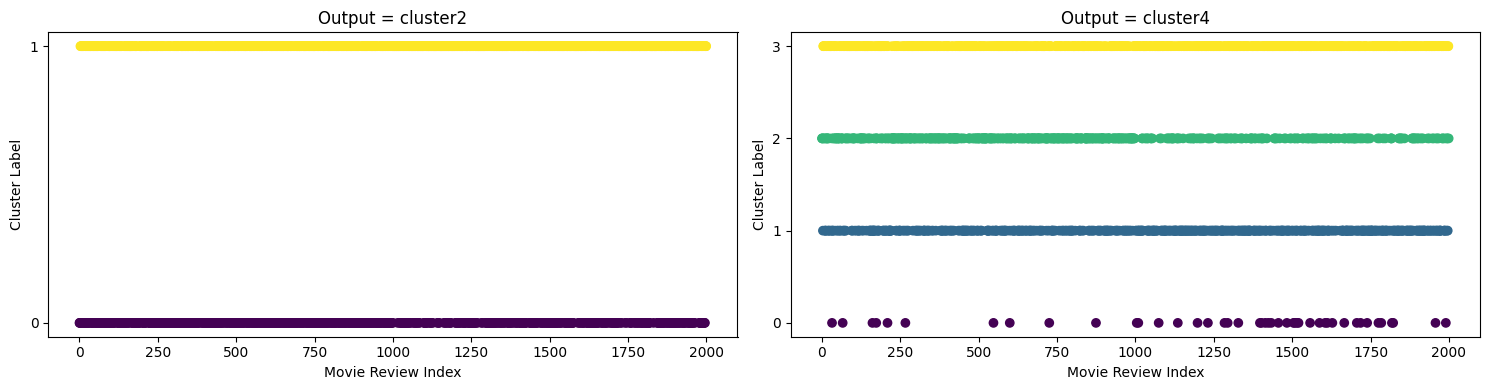

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# [5] Cluster and Visualize groups
# Create a scatter plot

list_label_cluster= df_review.columns[2:4].tolist()

# Create subplots
fig, axes = plt.subplots(1, len(list_label_cluster), figsize=(15, 4))

for i, label_cluster in enumerate(list_label_cluster):
    # Get the values of the specific column as an ndarray
    ndarray_cluster = df_review[label_cluster].values
    # Get the unique values and sort them in ascending order
    unique_values = np.sort(np.unique(ndarray_cluster))

    # Plot the clusters
    ax = axes[i]
    ax.scatter(range(len(list_review)), ndarray_cluster, c=ndarray_cluster, cmap='viridis', marker='o')
    ax.set_title(f"Output = {label_cluster}")
    ax.set_xlabel("Movie Review Index")
    ax.set_ylabel("Cluster Label")
    # Set the y-axis ticks and labels using sorted unique values
    ax.set_yticks(unique_values)
    ax.set_yticklabels(unique_values)

plt.tight_layout()
plt.show()

### [2.3] K-Means clustering with scatterplot output (6 clusters)

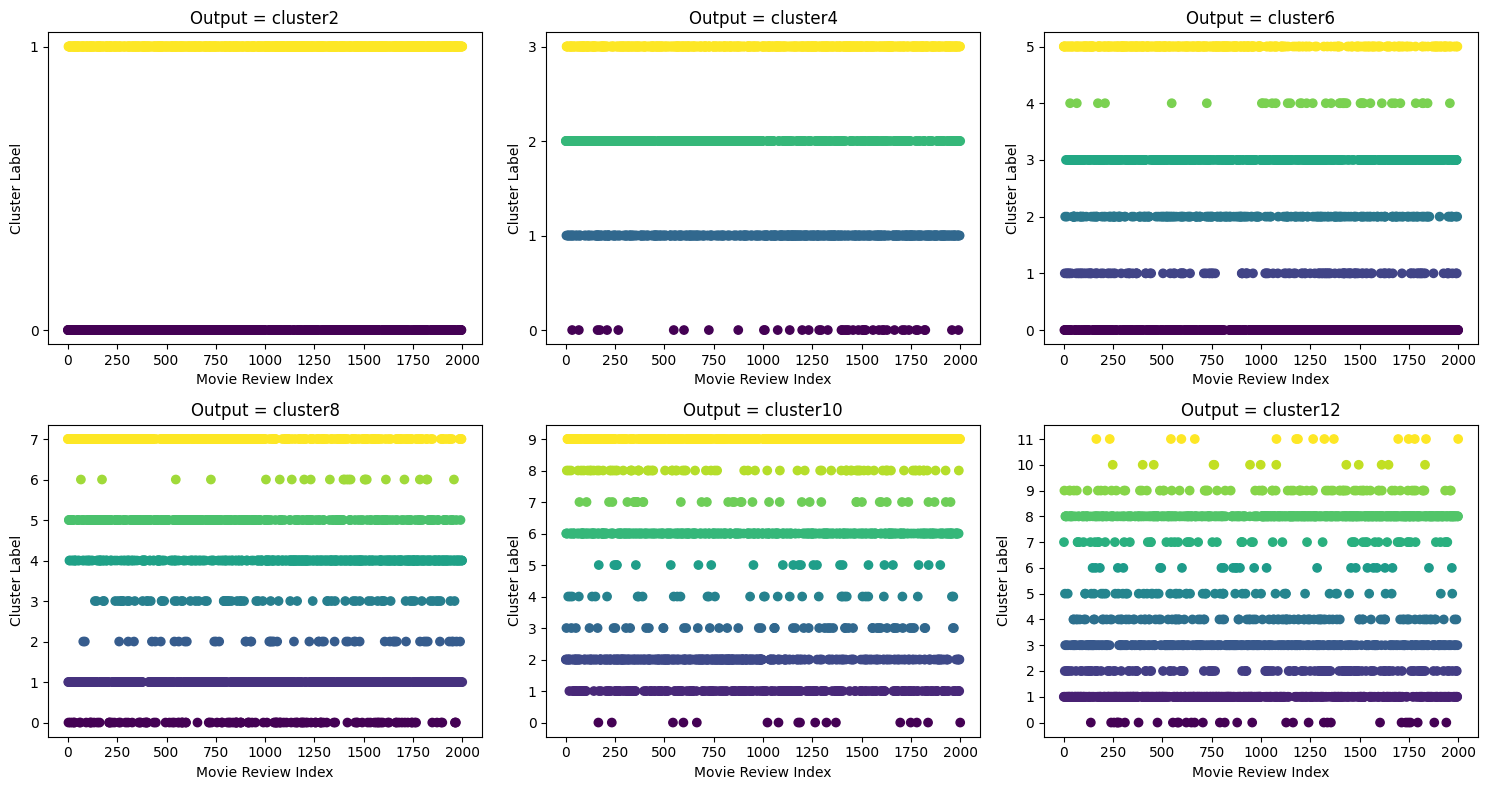

In [ ]:
# [5] Cluster and Visualize groups
# Create a scatter plot

list_label_cluster= df_review.columns[2:].tolist()

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, label_cluster in enumerate(list_label_cluster):
    # Get the values of the specific column as an ndarray
    ndarray_cluster = df_review[label_cluster].values
    # Get the unique values and sort them in ascending order
    unique_values = np.sort(np.unique(ndarray_cluster))

    # Plot the clusters
    ax = axes[i // 3, i % 3]
    ax.scatter(range(len(list_review)), ndarray_cluster, c=ndarray_cluster, cmap='viridis', marker='o')
    ax.set_title(f"Output = {label_cluster}")
    ax.set_xlabel("Movie Review Index")
    ax.set_ylabel("Cluster Label")
    # Set the y-axis ticks and labels using sorted unique values
    ax.set_yticks(unique_values)
    ax.set_yticklabels(unique_values)

plt.tight_layout()
plt.show()

## [3] K-Means clustering with Principal Component Analysis (PCA)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


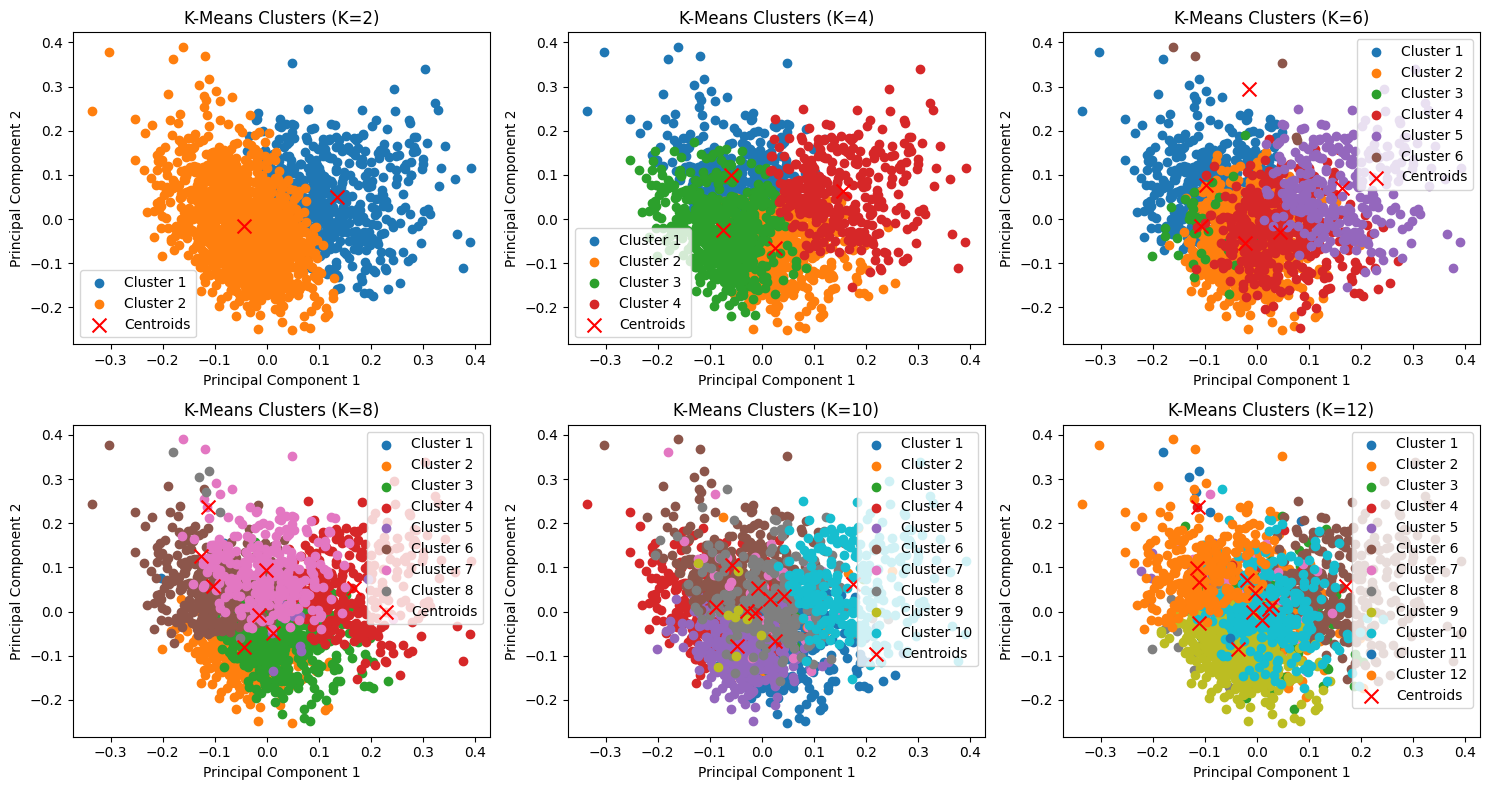

In [10]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# [1] Prep dataset
# Get movie_reviews dataset
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# [2] Vectorize dataset
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None,max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Prep cluster values
# List of cluster values to explore
num_clusters_list = [2, 4, 6, 8, 10, 12]

# [4] Cluster and Visualize groups
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, num_clusters in enumerate(num_clusters_list):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(X)

    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())

    # Plot the clusters
    ax = axes[i // 3, i % 3]
    for j in range(num_clusters):
        cluster_points = reduced_X[kmeans.labels_ == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {j+1}")

    # Plot the centroids
    centroids = pca.transform(kmeans.cluster_centers_)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')

    ax.set_title(f"K-Means Clusters (K={num_clusters})")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.legend()

plt.tight_layout()
plt.show()

## [4] K-Means clustering with Singular Value Decomposition (SVD)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


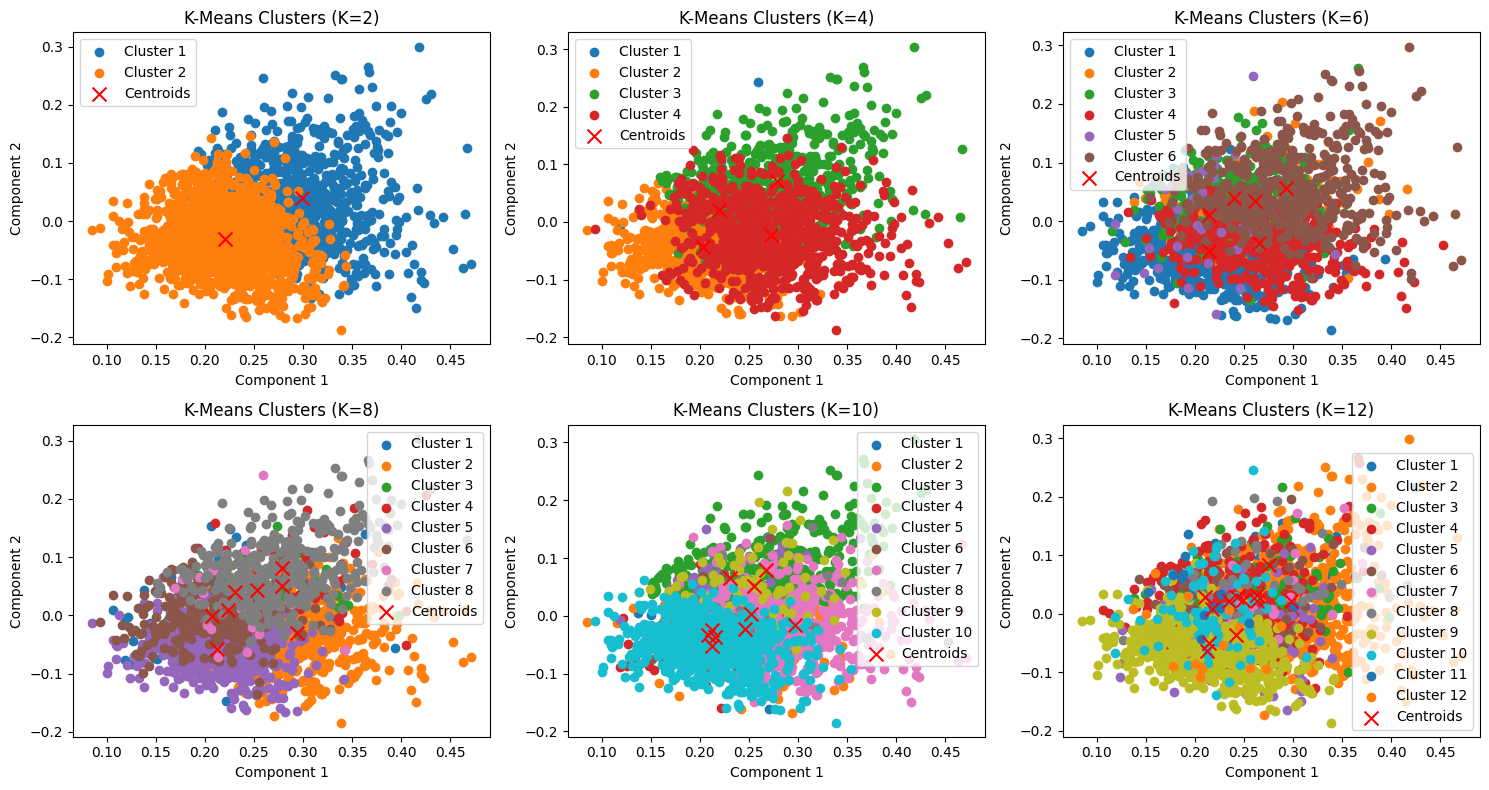

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# [1] Prep dataset
# Get movie_reviews dataset
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# [2] Vectorize dataset
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None,max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Prep cluster values
# List of cluster values to explore
num_clusters_list = [2, 4, 6, 8, 10, 12]

# [4] Cluster and Visualize groups
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, num_clusters in enumerate(num_clusters_list):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(X)

    # Reduce dimensions using SVD
    svd = TruncatedSVD(n_components=2)
    reduced_X = svd.fit_transform(X)

    # Plot the clusters
    ax = axes[i // 3, i % 3]
    for j in range(num_clusters):
        cluster_points = reduced_X[kmeans.labels_ == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {j+1}")

    # Plot the centroids
    centroids = svd.transform(kmeans.cluster_centers_)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red', label='Centroids')

    ax.set_title(f"K-Means Clusters (K={num_clusters})")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.legend()

plt.tight_layout()
plt.show()

## [5] K-Means clustering with t-Distributed Stochastic Neighbor Embedding (t-SNE)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


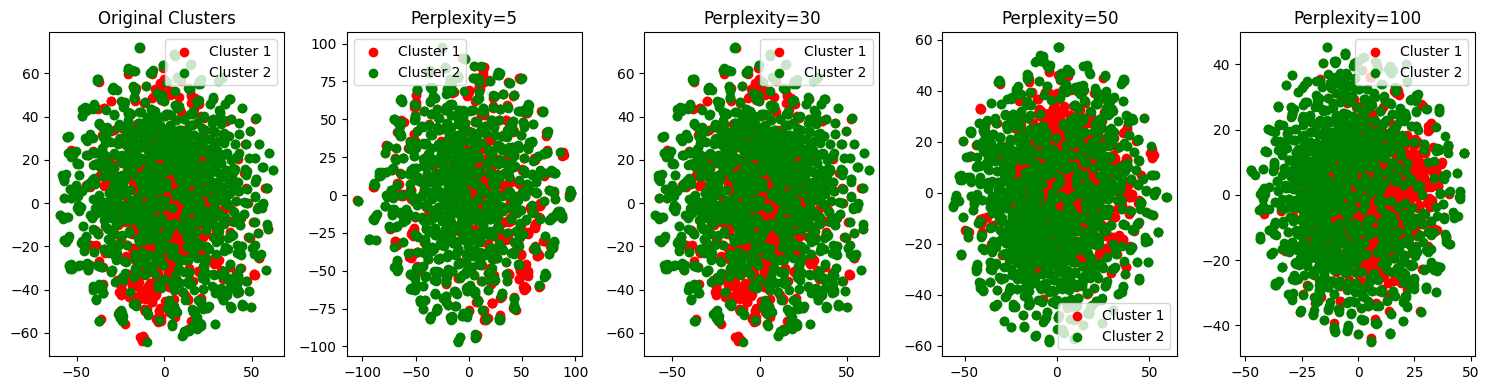

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# [1] Prep dataset
# Get movie_reviews dataset
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# [2] Vectorize dataset
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None,max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X)

# [4] Visualize groups with varying perplexity values

# Vary perplexity values
perplexities = [5, 30, 50, 100]

# Create subplots
fig, subplots = plt.subplots(1, len(perplexities) + 1, figsize=(15, 4))

# Plot original clusters
ax = subplots[0]
reduced_X = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X.toarray())
cluster_points = reduced_X[kmeans.labels_ == 0]
ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="r", label="Cluster 1")
cluster_points = reduced_X[kmeans.labels_ == 1]
ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="g", label="Cluster 2")
ax.set_title("Original Clusters")
ax.legend()

# Apply t-SNE for different perplexities
for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]
    reduced_X = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X.toarray())
    cluster_points = reduced_X[kmeans.labels_ == 0]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="r", label="Cluster 1")
    cluster_points = reduced_X[kmeans.labels_ == 1]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="g", label="Cluster 2")
    ax.set_title(f"Perplexity={perplexity}")
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# [1] Prep dataset
# Get movie_reviews dataset
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# [2] Vectorize dataset
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None,max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Perform K-means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X)

# [4] Visualize groups with varying perplexity values

# Vary perplexity values
perplexities = [5, 30, 50, 100]

# Create subplots
fig, subplots = plt.subplots(1, len(perplexities) + 1, figsize=(15, 4))

# Plot original clusters
ax = subplots[0]
reduced_X = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X.toarray())
cluster_points = reduced_X[kmeans.labels_ == 0]
ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="r", label="Cluster 1")
cluster_points = reduced_X[kmeans.labels_ == 1]
ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="g", label="Cluster 2")
ax.set_title("Original Clusters")
ax.legend()

# Apply t-SNE for different perplexities
for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]
    reduced_X = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X.toarray())
    cluster_points = reduced_X[kmeans.labels_ == 0]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="r", label="Cluster 1")
    cluster_points = reduced_X[kmeans.labels_ == 1]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c="g", label="Cluster 2")
    ax.set_title(f"Perplexity={perplexity}")
    ax.legend()

plt.tight_layout()
plt.show()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


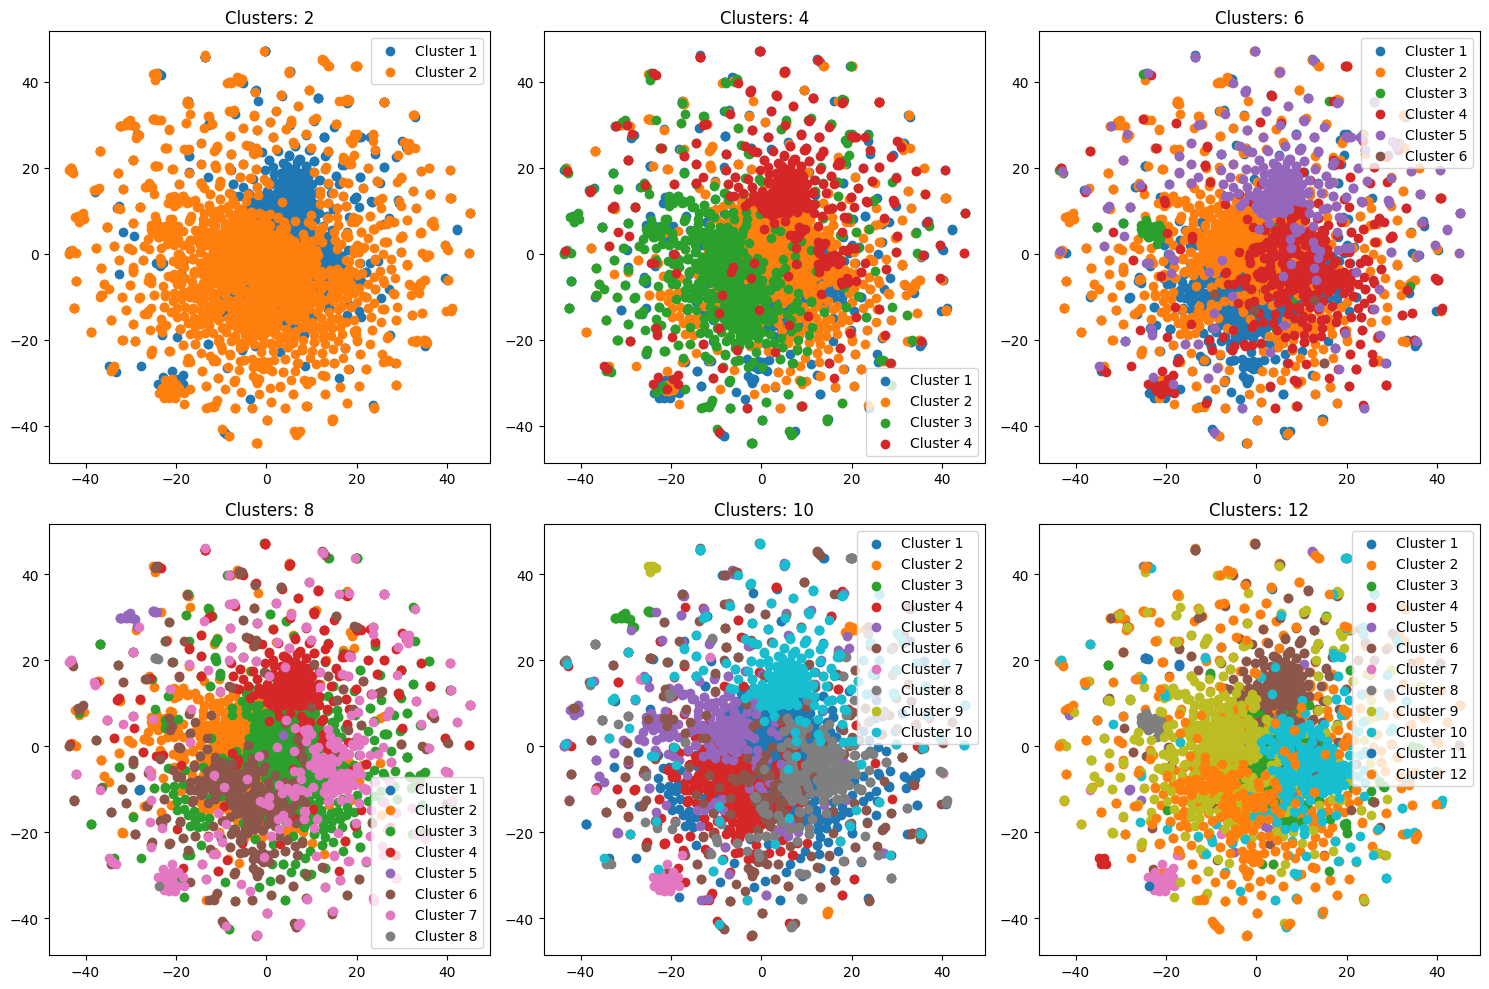

In [11]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# [1] Prep dataset
# Get movie_reviews dataset
nltk.download('movie_reviews')
# Load the movie_reviews dataset
from nltk.corpus import movie_reviews
list_review = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# [2] Vectorize dataset
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenize, token_pattern=None, max_features=4000)
X = vectorizer.fit_transform(list_review)

# [3] Perform K-means clustering
cluster_values = [2, 4, 6, 8, 10, 12]
fig, subplots = plt.subplots(2, 3, figsize=(15, 10))

for i, n_clusters in enumerate(cluster_values):
    row = i // 3
    col = i % 3

    ax = subplots[row][col]

    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X)

    reduced_X = TSNE(n_components=2, random_state=42).fit_transform(X.toarray())
    for label in range(n_clusters):
        cluster_points = reduced_X[kmeans.labels_ == label]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label+1}")

    ax.set_title(f"Clusters: {n_clusters}")
    ax.legend()

plt.tight_layout()
plt.show()